In [238]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd

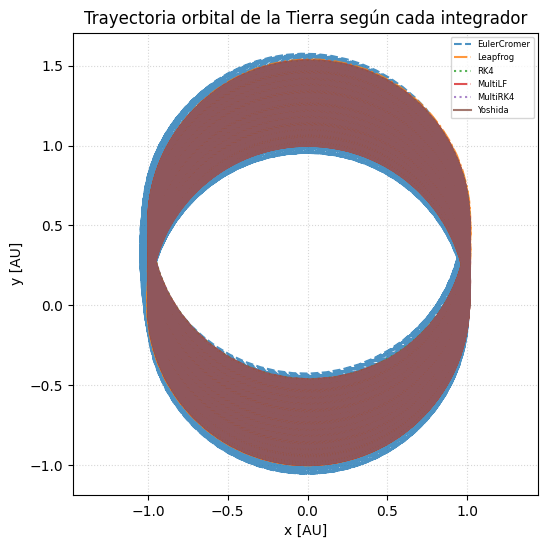

In [239]:
AU = 1.496e11

# Nombres de archivos y métodos
methods = ["Euler", "EulerCromer", "Leapfrog", "RK4", "MultiLF", "MultiRK4", "Yoshida"]
styles = ['-', '--', '-.', ':', '-.', ':', '-']

# Gráfico de órbita de la Tierra para cada método
plt.figure(figsize=(6,6))
for m in methods[1:]:
    # Carga CSV
    df = pd.read_csv(f"{m}.csv")
    # Filtrar datos de la Tierra y convertir a UA
    df_earth = df[df['name'] == 'Earth'].copy()
    df_earth['x_au'] = df_earth['x'] / AU
    df_earth['y_au'] = df_earth['y'] / AU

    # Trazar
    plt.plot(df_earth['x_au'], df_earth['y_au'], label=m, linestyle=styles[methods.index(m)], alpha=0.8)

plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Trayectoria orbital de la Tierra según cada integrador')
plt.legend(loc='upper right', fontsize=6)
plt.axis('equal')
plt.grid(linestyle=':', alpha=0.5)
plt.show()


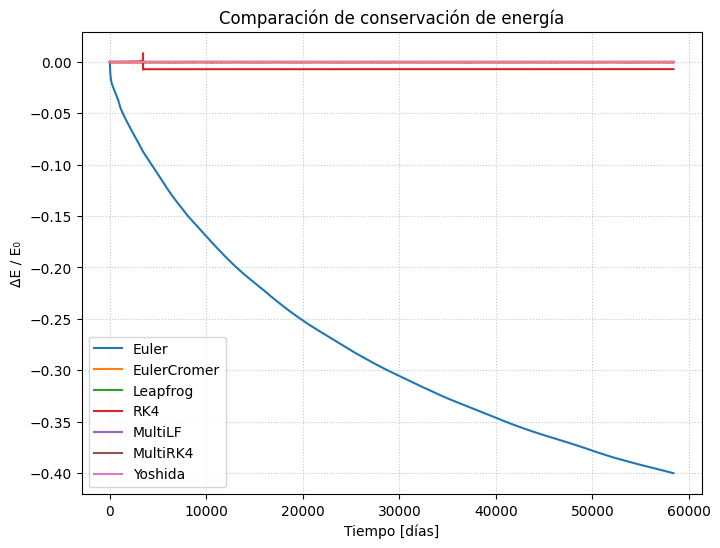

In [240]:
# Prepare figure for energy comparison
plt.figure(figsize=(8, 6))

for method in methods[:]:
    # Read CSV
    df = pd.read_csv(f"{method}.csv")
    # Assume E column exists
    # Only take unique time points for one body (e.g., Sun) to track global E
    df_unique = df[df['name'] == 'Sun'][['t', 'E']].copy()
    df_unique.sort_values('t', inplace=True)
    
    # Compute fractional energy change
    E0 = df_unique['E'].iloc[0]
    df_unique['ΔE/E0'] = (df_unique['E'] - E0) / E0
    # Plot
    plt.plot(df_unique['t'] / (24*3600), df_unique['ΔE/E0'], label=method)

plt.xlabel("Tiempo [días]")
plt.ylabel("ΔE / E₀")
plt.title("Comparación de conservación de energía")
plt.legend()
plt.grid(linestyle=':', alpha=0.7)
plt.show()


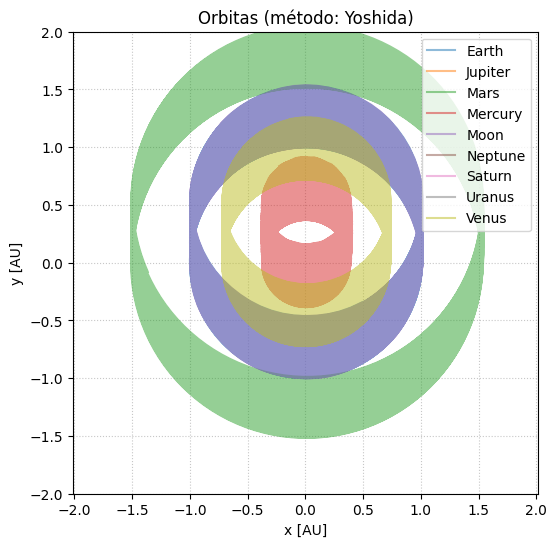

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parámetros del script
AU = 1.496e11  # Unidad astronómica en m
selected_method = "Yoshida"  # Cambia aquí al método deseado: "Euler", "EulerCromer", "Leapfrog" o "RK4"
earth_mass = 5.9724e24  # kg
sec_per_day = 24*3600
sec_per_year = 365 * sec_per_day


df_sel = pd.read_csv(f"{selected_method}.csv")
bodies = sorted(df_sel['name'].unique())
if "Sun" in bodies:
    bodies.remove("Sun")

plt.figure(figsize=(6,6))
for body in bodies[:]:
    df_body = df_sel[df_sel['name'] == body].copy()
    df_body['x_au'] = df_body['x'] / AU
    df_body['y_au'] = df_body['y'] / AU
    plt.plot(df_body['x_au'], df_body['y_au'], label=body, alpha=0.5)

plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title(f'Orbitas (método: {selected_method})')
plt.legend(loc='upper right')
plt.axis('equal')
plt.grid(linestyle=':', alpha=0.7)
plt.xlim(-2, 2)
plt.ylim(-2, 2)



plt.show()




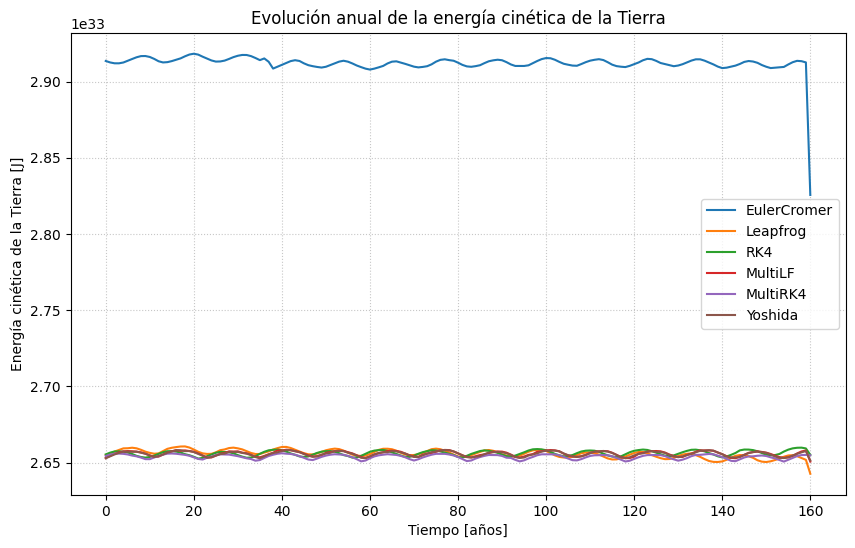

In [242]:
plt.figure(figsize=(10, 6))
for method in methods[1:]:
    df = pd.read_csv(f"{method}.csv")
    df_e = df[df['name'] == 'Earth'].copy()
    df_e['t_years'] = df_e['t'] / sec_per_year
    df_e['KE'] = 0.5 * earth_mass * (df_e['vx']**2 + df_e['vy']**2 + df_e['vz']**2)
    df_e['year'] = (df_e['t'] / sec_per_year).astype(int)
    df_yearly = df_e.groupby('year')['KE'].max().reset_index()
    plt.plot(df_yearly['year'], df_yearly['KE'], label=method)

plt.xlabel('Tiempo [años]')
plt.ylabel('Energía cinética de la Tierra [J]')
plt.title('Evolución anual de la energía cinética de la Tierra')
plt.legend()
plt.grid(linestyle=':', alpha=0.7)
plt.show()

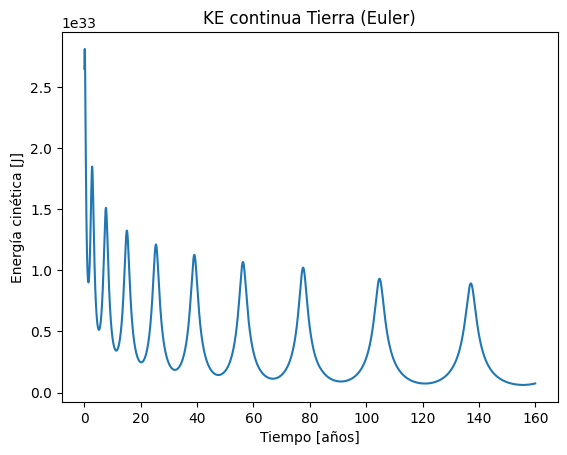

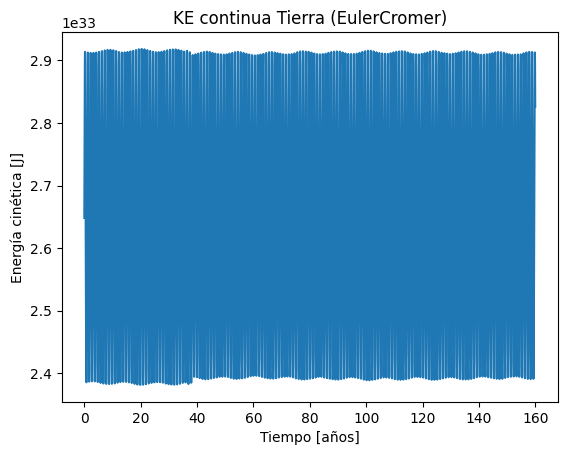

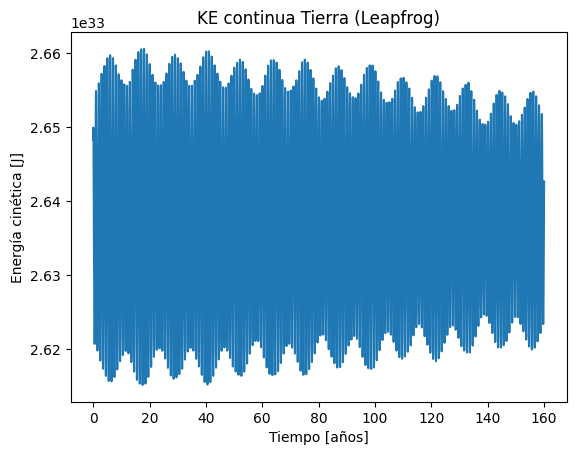

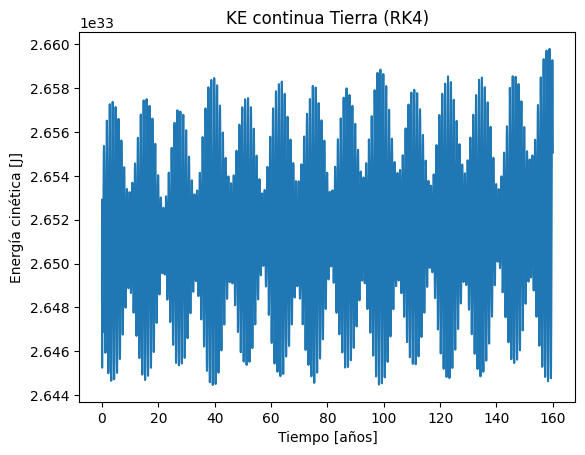

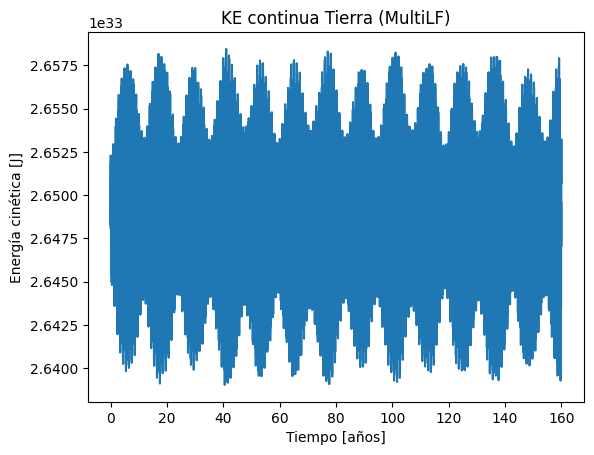

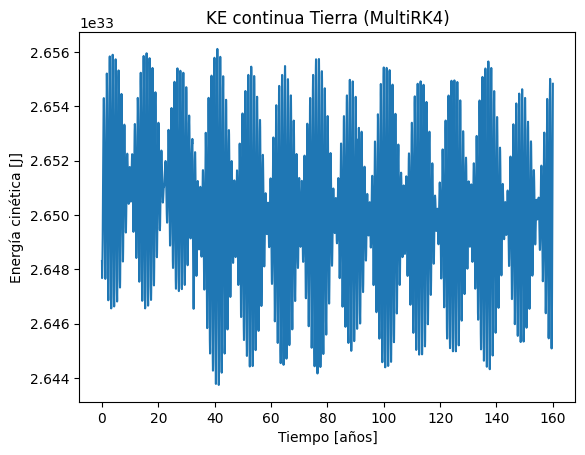

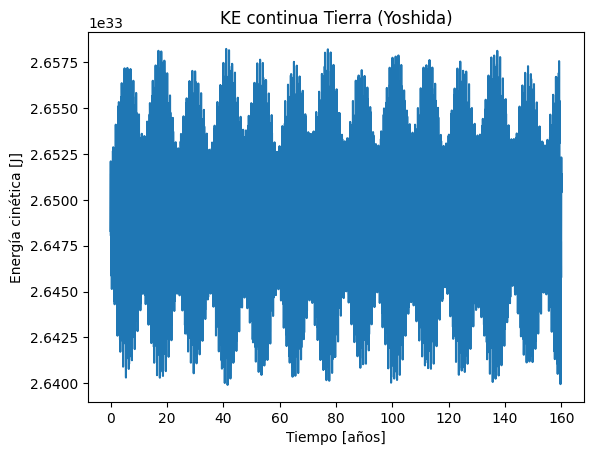

In [243]:
for method in methods[:]:
    df = pd.read_csv(f"{method}.csv")
    df_e = df[df['name'] == 'Earth'].copy()
    df_e['t_years'] = df_e['t'] / sec_per_year
    df_e['KE'] = 0.5 * earth_mass * (df_e['vx']**2 + df_e['vy']**2 + df_e['vz']**2)
    plt.plot(df_e['t']/sec_per_year, df_e['KE'])
    plt.xlabel('Tiempo [años]')
    plt.ylabel('Energía cinética [J]')
    plt.title(f'KE continua Tierra ({method})')
    plt.show()
